# **Estimation of Prediction for getting heart disease using linear Regression Model of Machine Learning**

# **1. Getting the Dataset** 

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
heart_data = pd.read_csv("/kaggle/input/heart-diseaset/Heart_Disease.csv", sep=";")

# **2. Data Representation**

In [46]:

heart_data.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att16,att17,att18,att19,att20,att21,att22,att23,att24,label
0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.000000,-0.296296,-0.818533,0.907407,-1.0,0
1,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,1.0,-0.947368,-0.481481,-0.389961,0.444444,-1.0,0
2,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,1.0,-0.947368,-0.111111,-0.359657,0.629630,-1.0,0
3,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-0.894737,0.444444,-0.413127,0.629630,-1.0,0
4,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-0.842105,-0.851852,-0.482625,0.259259,-1.0,0


# **3. Correlation matrix**

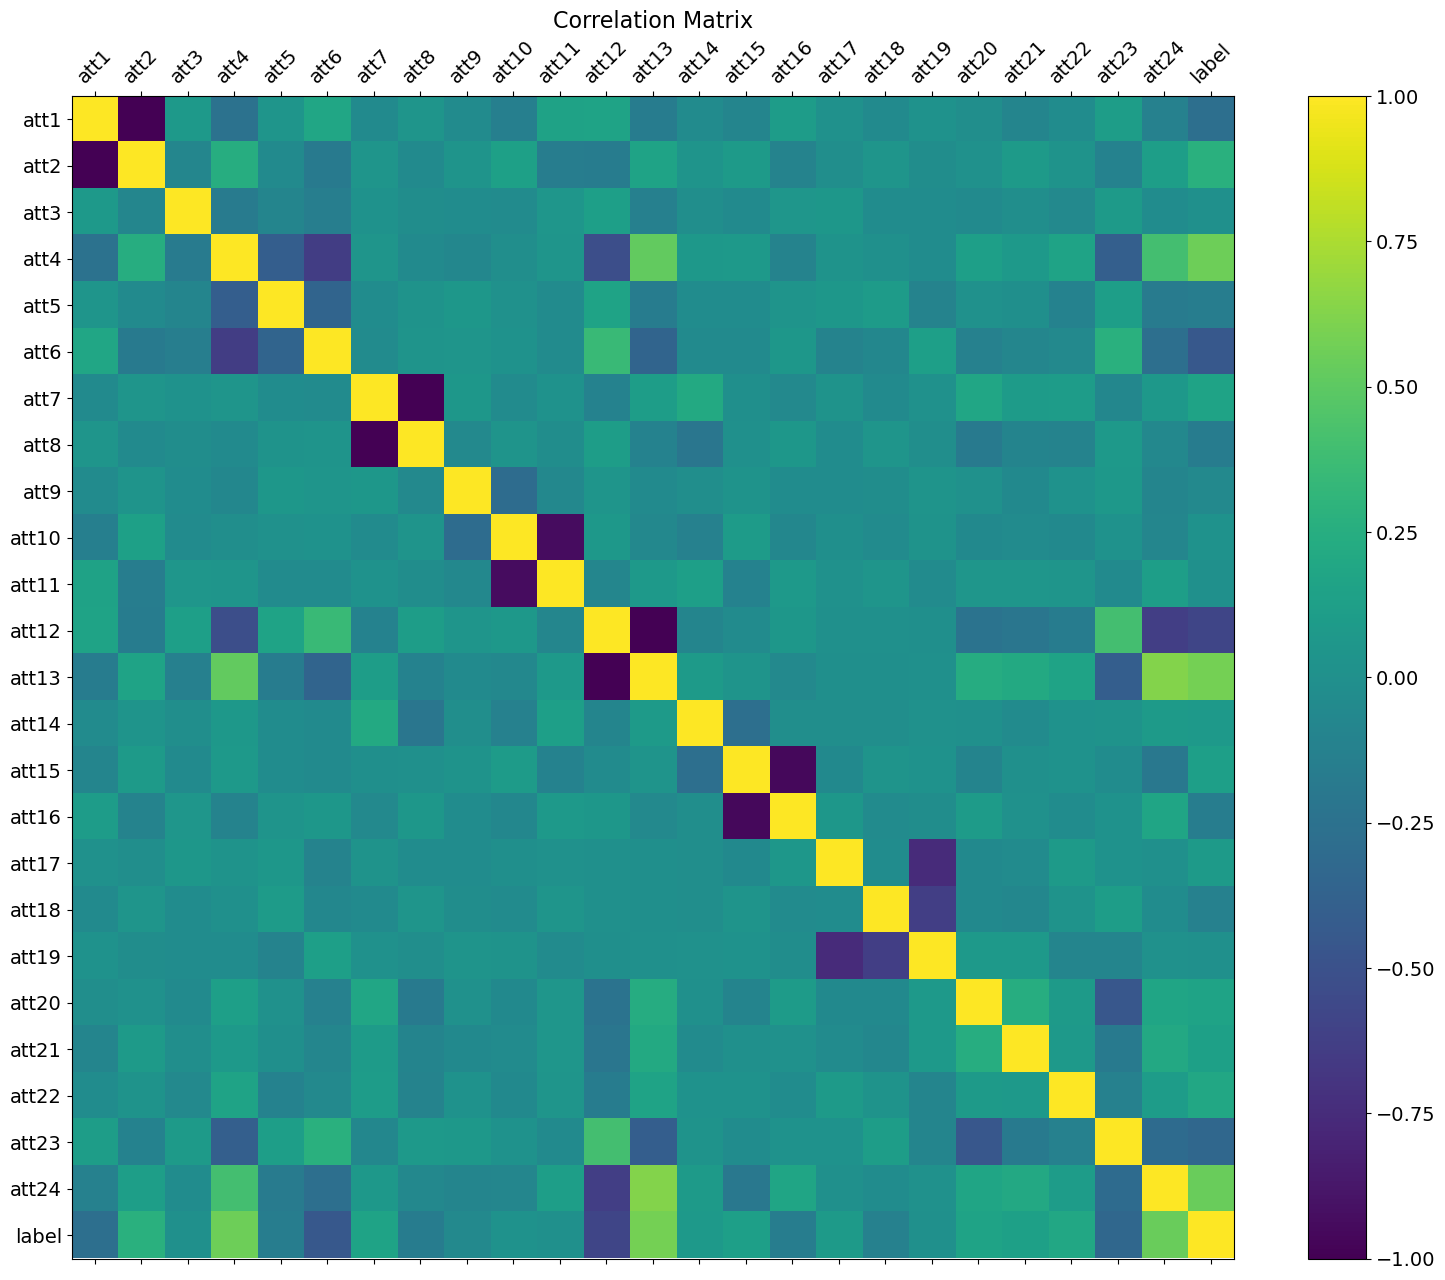

In [47]:
f = plt.figure(figsize=(19, 15))
plt.matshow(heart_data.corr(), fignum=f.number)
plt.xticks(range(heart_data.select_dtypes(['number']).shape[1]), heart_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(heart_data.select_dtypes(['number']).shape[1]), heart_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [48]:
heart_data.corr()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att16,att17,att18,att19,att20,att21,att22,att23,att24,label
att1,1.000000,-1.000000,0.079005,-0.245204,0.041730,0.187032,-0.045663,0.045663,-0.035164,-0.134310,...,0.103652,0.010286,-0.046370,0.022300,-0.013618,-0.088711,-0.027571,0.111278,-0.118931,-0.272781
att2,-1.000000,1.000000,-0.079005,0.245204,-0.041730,-0.187032,0.045663,-0.045663,0.035164,0.134310,...,-0.103652,-0.010286,0.046370,-0.022300,0.013618,0.088711,0.027571,-0.111278,0.118931,0.272781
att3,0.079005,-0.079005,1.000000,-0.167208,-0.093518,-0.148039,0.017916,-0.017916,-0.028457,-0.037379,...,0.049913,0.061883,-0.030790,-0.027947,-0.046176,-0.008591,-0.056485,0.086586,-0.028583,0.001270
att4,-0.245204,0.245204,-0.167208,1.000000,-0.402296,-0.636837,0.044710,-0.044710,-0.073648,-0.012730,...,-0.105256,0.031053,0.003231,-0.026226,0.129387,0.083299,0.163620,-0.393298,0.404511,0.555071
att5,0.041730,-0.041730,-0.093518,-0.402296,1.000000,-0.356177,-0.023495,0.023495,0.055787,0.014415,...,0.035334,0.056372,0.098773,-0.108294,0.010551,-0.003758,-0.109973,0.124422,-0.166046,-0.154941
att6,0.187032,-0.187032,-0.148039,-0.636837,-0.356177,1.000000,-0.034067,0.034067,0.041921,0.016227,...,0.059913,-0.101821,-0.070804,0.125321,-0.123184,-0.079151,-0.057083,0.269495,-0.270372,-0.445805
att7,-0.045663,0.045663,0.017916,0.044710,-0.023495,-0.034067,1.000000,-1.000000,0.056544,-0.035793,...,-0.055732,0.023827,-0.042194,0.009055,0.180962,0.097145,0.107689,-0.070443,0.063722,0.162869
att8,0.045663,-0.045663,-0.017916,-0.044710,0.023495,0.034067,-1.000000,1.000000,-0.056544,0.035793,...,0.055732,-0.023827,0.042194,-0.009055,-0.180962,-0.097145,-0.107689,0.070443,-0.063722,-0.162869
att9,-0.035164,0.035164,-0.028457,-0.073648,0.055787,0.041921,0.056544,-0.056544,1.000000,-0.291153,...,-0.029775,-0.027084,-0.022542,0.035757,0.015550,-0.048617,0.021856,0.069809,-0.093253,-0.058280
att10,-0.134310,0.134310,-0.037379,-0.012730,0.014415,0.016227,-0.035793,0.035793,-0.291153,1.000000,...,-0.070527,-0.001283,-0.034707,0.023666,-0.052676,-0.032471,-0.047784,0.019412,-0.083003,0.016227


# **4. Eliminating the attributes which are linear related each other**

*   column 1 and 2
*   column 7 and 8
*   columnt 10 and 11
*   column 15 and 16
*   column 12 and 13
*   Column 19 and 17


In [49]:
heart_data = heart_data.drop(["att1", "att7", "att10", "att13", "att16"], axis=1)
heart_data.head(5)

,att2,att3,att4,att5,att6,att8,att9,att11,att12,att14,att15,att17,att18,att19,att20,att21,att22,att23,att24,label
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.000000,-0.296296,-0.818533,0.907407,-1.0,0
1,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-0.947368,-0.481481,-0.389961,0.444444,-1.0,0
2,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-0.947368,-0.111111,-0.359657,0.629630,-1.0,0
3,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-0.894737,0.444444,-0.413127,0.629630,-1.0,0
4,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-0.842105,-0.851852,-0.482625,0.259259,-1.0,0


# **After Elimination**


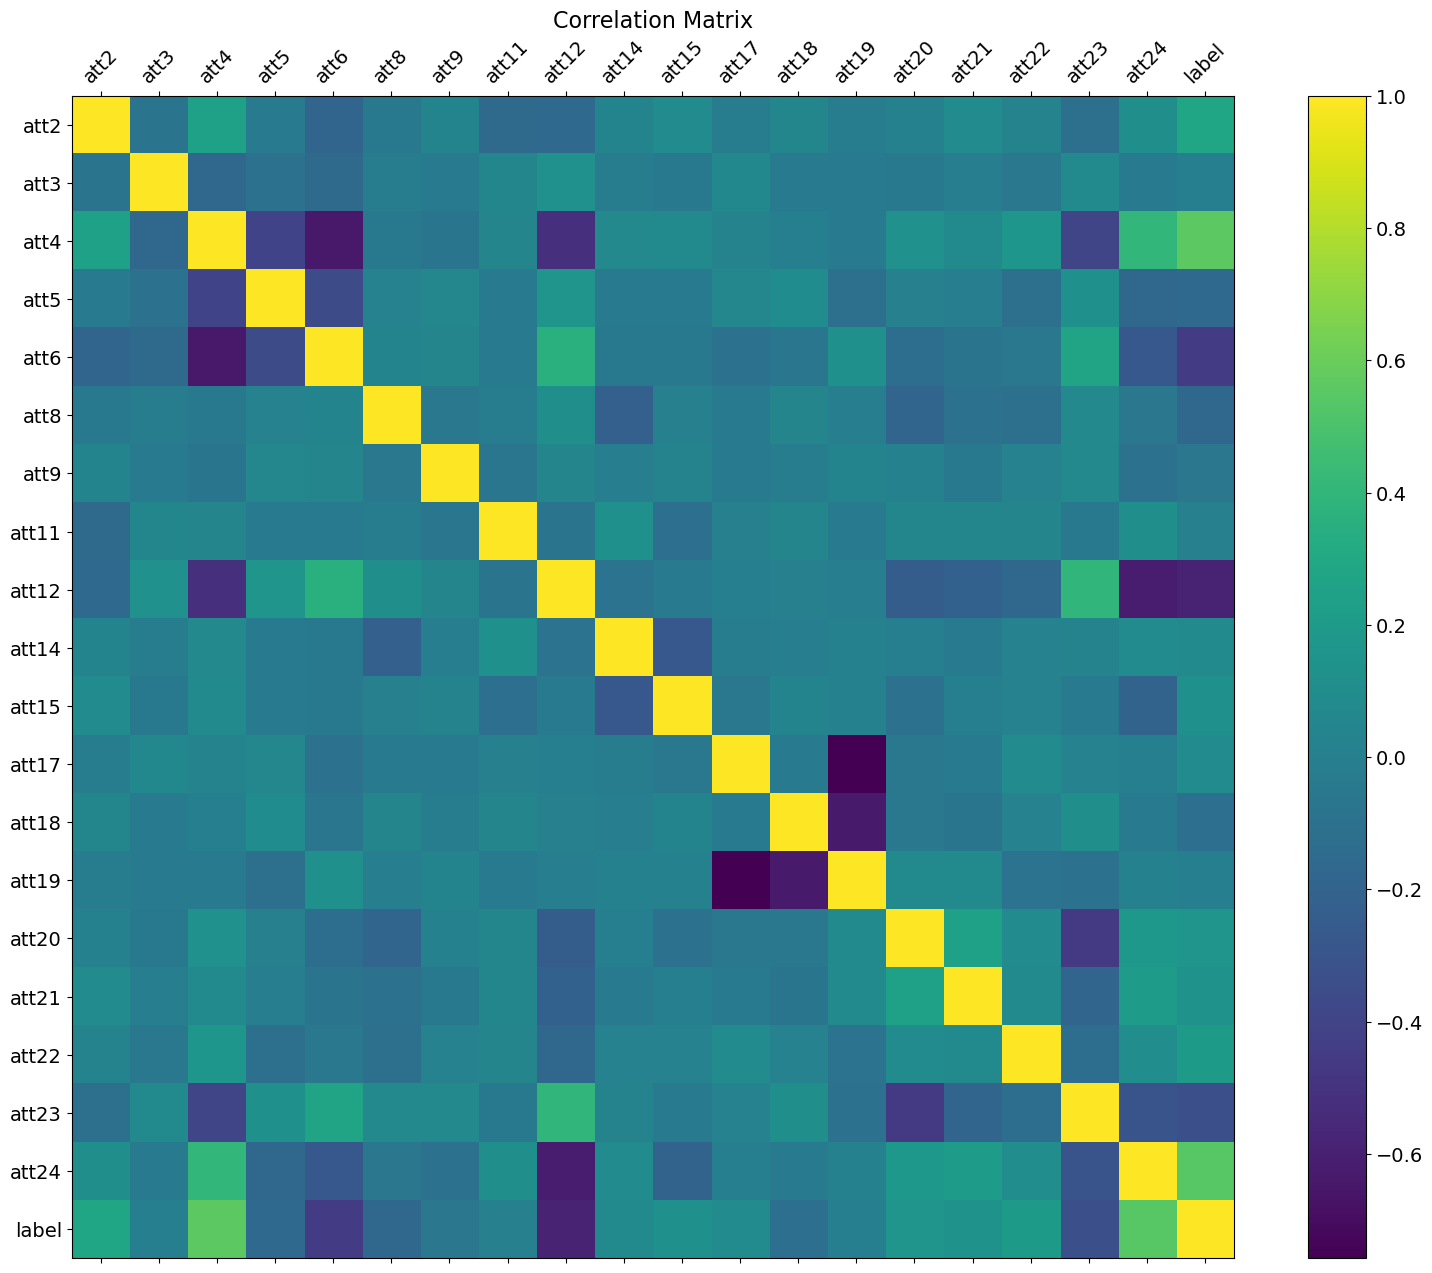

In [50]:
f = plt.figure(figsize=(19, 15))
plt.matshow(heart_data.corr(), fignum=f.number)
plt.xticks(range(heart_data.select_dtypes(['number']).shape[1]), heart_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(heart_data.select_dtypes(['number']).shape[1]), heart_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# **5. Seperating the data for training**

In [51]:
Y = heart_data.pop("label")
Y.head(3)

0    0
1    0
2    0
Name: label, dtype: int64

In [52]:
heart_data.head(2)

,att2,att3,att4,att5,att6,att8,att9,att11,att12,att14,att15,att17,att18,att19,att20,att21,att22,att23,att24
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.000000,-0.296296,-0.818533,0.907407,-1.0
1,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-0.947368,-0.481481,-0.389961,0.444444,-1.0


# **6.Spliting the data into train, test and validation**

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart_data, Y, test_size=0.2, shuffle=True)
X_train, X_validate, y_train, y_validate = train_test_split(heart_data, Y, test_size=0.2, shuffle=True)

# **7.Training the data**

In [54]:

from sklearn.linear_model import LinearRegression
lin_regress = LinearRegression()
lin_regress.fit(X_train, y_train)


LinearRegression()

# **8.Getting The predictions**

In [55]:
predictions = lin_regress.predict(X_test)
predictions

array([ 0.40883592,  0.5903048 ,  0.72234241,  0.13259392,  0.61420651,
        0.69560945,  0.20583588, -0.08856761, -0.08647612,  0.75760522,
        0.69972087,  0.113723  ,  0.41424478,  0.41763472,  0.08660652,
        0.77955496,  0.26324756,  0.3672924 ,  0.70110189,  0.46757017,
        0.38628816,  0.20767527,  1.03987008,  0.01926034,  0.09261434,
        0.00694543,  0.66624313,  0.20310426, -0.35485042,  0.39208864,
        0.05395338,  0.04882506,  1.067919  ,  0.65736905,  0.03065798,
        0.10278826,  0.81646596, -0.06664519,  0.83360384,  0.09179987,
        0.0542285 , -0.15248084, -0.08044985,  0.64705431,  0.08558832,
        0.14642204,  1.01797038,  1.07256153, -0.01843236, -0.13220416,
        0.11009201, -0.09147088,  0.40173468, -0.08867705,  0.34844273,
        0.2222145 ,  0.11716419, -0.03761888,  0.76725889])

# **8.Training Scores**

In [56]:
lin_regress.score(X_train, y_train)

0.547606701297794

# **9.Adding threshold to help in classifing the model**

In [57]:
predictions = [1 if p > 0.5 else 0 for p in predictions]
predictions

[0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

# **10. Scores after adding threshold value**

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)


0.864406779661017

Accuraccy is looks better after adding threshold. so far this model cant give good compares to other models. the data was already normalized so no need to further dos with the data. Overall, we can say we can do it better if used logistic regression. 

# **11. Logistic reggression**

In [59]:
from sklearn.linear_model import LogisticRegression

# **12. Training Logistic Regression**

In [60]:
log_regress = LogisticRegression()
log_regress.fit(X_train, y_train)

LogisticRegression()

# **13. Prediction**

In [61]:
predictions1 = log_regress.predict(X_test)
predictions1

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

# **14.scores of logistic Regression**

In [63]:
log_regress.score(X_train, y_train)

0.8595744680851064

# **15. Decision Trees**

In [70]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy : ", accuracy_dt)


Accuracy :  0.9661016949152542


# **16.Random Forest**


In [68]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy : ", accuracy_rf)


Accuracy :  0.9661016949152542
